[View in Colaboratory](https://colab.research.google.com/github/micheledw/models/blob/master/Copy_of_Semantic_Similarity_with_TF_Hub_Universal_Encoder.ipynb)

##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


This notebook illustrates how to access the Universal Sentence Encoder and use it for sentence similarity and sentence classification tasks.

The Universal Sentence Encoder makes getting sentence level embeddings as easy as it has historically been to lookup the embeddings for individual words. The sentence embeddings can then be trivially used to compute sentence level meaning similarity as well as to enable better performance on downstream classification tasks using less supervised training data.


# Getting Started

This section sets up the environment for access to the Universal Sentence Encoder on TF Hub and provides examples of applying the encoder to words, sentences, and paragraphs.

In [0]:
# Install the latest Tensorflow version.
!pip3 install --quiet "tensorflow>=1.7"
# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [0]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# Compute a representation for each message, showing various lengths supported.

sentence = 'What areas did Beyonce compete in when she was growing up?'
paragraph = ("Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981)"
             " is an American singer, songwriter, record producer and actress."
              "Born and raised in Houston, Texas,"
             " she performed in various singing and dancing competitions as a child, "
             "and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child."
             " Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. "
             "Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003)" 
             "which established her as a solo artist worldwide,"
             " earned five Grammy Awards and featured the Billboard Hot 100 number-one singles"
             "'Crazy in Love' 'Baby Boy'")
#####divide the paragrpah into senetnces"
from nltk import tokenize
tf.logging.set_verbosity(tf.logging.ERROR)

a5=tokenize.sent_tokenize(paragraph)

###### calculate the similarity using an encoder
for i in a5:
   messages = [sentence, i]
   with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        message_embeddings = session.run(embed(messages))

   for j, message_embedding in enumerate(np.array(message_embeddings).tolist()):
         # print("Message: {}".format(messages[j])) ### print question nd all the senetces one by one.
         # print("Embedding size: {}".format(len(message_embedding))) ### print the embedding size
          message_embedding_snippet = ", ".join(
              (str(x) for x in message_embedding))
          print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
        #  print(message_embedding)
    

Embedding: [-0.04654957726597786, 0.010889229364693165, -0.02977318875491619, -0.03180553391575813, -0.08141955733299255, -0.05314838886260986, 0.05403389409184456, -0.016069350764155388, -0.03578321263194084, -0.003379354951903224, 0.00503432797268033, -0.05298297479748726, 0.07169020175933838, 0.023512961342930794, -0.0664435550570488, 0.061597876250743866, -0.010972424410283566, -0.07573574036359787, -0.0026271941605955362, 0.09710334241390228, -0.07218800485134125, -0.03121899627149105, -0.02413090504705906, 0.02678012102842331, 0.06648796051740646, -0.07677074521780014, 0.05927601084113121, -0.035389650613069534, -0.06023453548550606, -0.0322546511888504, -0.03582589700818062, -0.011133117601275444, -0.01452320534735918, 0.020006395876407623, 0.045642390847206116, -0.0031861811876296997, -0.09152854233980179, 0.008634591475129128, -0.050010934472084045, -0.05191090330481529, 0.03994400054216385, 0.06173449754714966, 0.0177033431828022, -0.026039741933345795, -0.06206507608294487, 

# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [0]:
print(message_embedding)
import pandas
import numpy as np
from keras import backend
from keras.layers import Activation, Dense, Input, Subtract
from keras.models import Model
import numpy

INPUT_DIM = 1
# Model.
h_1 = Dense(128, activation = "relu")
s = Dense(1)

# Relevant document score.
rel_doc = Input(shape = (INPUT_DIM, ), dtype = "float32")
h_1_rel = h_1(rel_doc)
rel_score = s(h_1_rel)

# Irrelevant document score.
irr_doc = Input(shape = (INPUT_DIM, ), dtype = "float32")
h_1_irr = h_1(irr_doc)
irr_score = s(h_1_irr)

# Subtract scores.
diff = Subtract()([rel_score, irr_score])

# Pass difference through sigmoid function.
prob = Activation("sigmoid")(diff)

# Build model.
model = Model(inputs = [rel_doc, irr_doc], outputs = prob)
model.compile(optimizer = "adadelta", loss = "binary_crossentropy")

#  data.
N = 1
x1 = numpy.ndarray((1, 1)) 
x1[0,0] = message_embedding[0]
x2 = numpy.ndarray((1, 1))
x2[0,0] = message_embedding[1]
y = y = np.ones((x1.shape[0], 1))


# Train model.
NUM_EPOCHS = 10
BATCH_SIZE = 10
history = model.fit([x1, x2], y, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, verbose = 1)

# Generate scores from document/query features.
get_score = backend.function([rel_doc], [rel_score])
a= get_score([x1])

#b= get_score([X_2])
print (a)
b = get_score([x2])
print (b)
#dis.dis(backend.function)

print (sentence)
if a >b: 
   print (a5[0])
else:
   print (a5[1])


[-0.016071774065494537, -0.010912831872701645, -0.03198881074786186, -0.06060373783111572, -0.057979241013526917, -0.007859249599277973, 0.02723477967083454, 0.051541853696107864, -0.014140700921416283, 0.05924459174275398, 0.07339701056480408, -0.021777166053652763, -0.015114465728402138, 0.07598266005516052, 0.03502974659204483, 0.03902893513441086, -0.06259510666131973, -0.05167810618877411, 0.011247864924371243, 0.027867062017321587, 0.0022951664868742228, -0.0768599659204483, 0.04900255799293518, 0.00012845982564613223, 0.018412182107567787, 0.06933209300041199, 0.005308688618242741, -0.03448203206062317, -0.05668706074357033, 0.029186749830842018, -0.017214937135577202, 0.04631383717060089, 0.015536703169345856, 0.06327174603939056, 0.060166846960783005, 0.04152070730924606, -0.047946251928806305, 0.014970536343753338, 0.024481870234012604, -0.06182713434100151, 0.05359535664319992, 0.008104788139462471, 0.0021289768628776073, 0.007975122891366482, -0.0729064866900444, 0.05739069

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

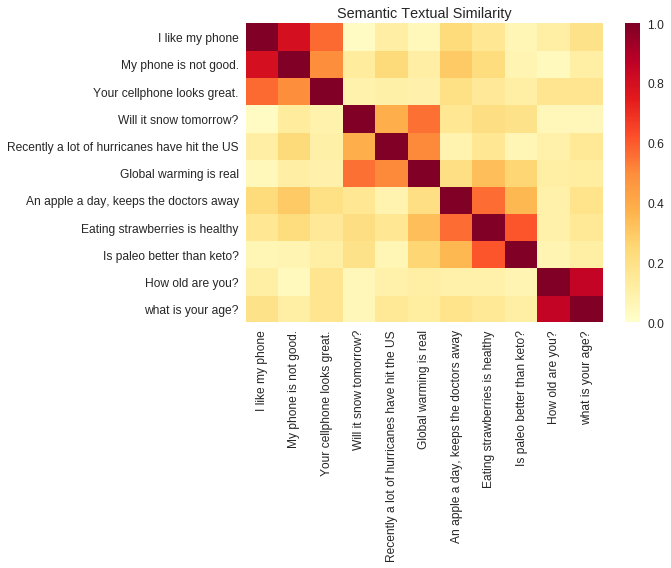

## Evaluation: STS (Semantic Textual Similarity) Benchmark

The [**STS Benchmark**](http://ixa2.si.ehu.es/stswiki/index.php/STSbenchmark) provides an intristic evaluation of the degree to which similarity scores computed using sentence embeddings align with human judgements. The benchmark requires systems to return similarity scores for a diverse selection of sentence pairs. [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is then used to evaluate the quality of the machine similarity scores against human judgements.

### Download data

### Build Evaluation Graph

### Evaluate Sentence Embeddings